In [1]:
!git clone https://github.com/BM2304/ML_Tutorials

fatal: destination path 'ML_Tutorials' already exists and is not an empty directory.


In [2]:
!ls ML_Tutorials/Self_Driving_Udemy/self_driving_simulator_data/

driving_log.csv  IMG


In [0]:
# Import Libs
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random

In [4]:
# Read CSV

datadir = 'ML_Tutorials/Self_Driving_Udemy/self_driving_simulator_data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1) # don't shorten
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_629.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_629.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_629.jpg,0.0,0.0,0,6.938794e-06
1,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_700.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_700.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_700.jpg,0.0,0.0,0,9.066085e-06
2,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_780.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_780.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_780.jpg,0.0,0.0,0,1.195853e-05
3,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_851.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_851.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_851.jpg,0.0,0.0,0,1.056165e-05
4,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\center_2019_03_14_18_40_52_928.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\left_2019_03_14_18_40_52_928.jpg,C:\Users\bjorn_000\Desktop\Deep_Learning\ML_Tutorials_Github\Self_Driving_Udemy\self_driving_simulator_data\IMG\right_2019_03_14_18_40_52_928.jpg,0.0,0.0,0,9.042565e-07


In [5]:
# Reformat Img file name (del head)

def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_03_14_18_40_52_629.jpg,left_2019_03_14_18_40_52_629.jpg,right_2019_03_14_18_40_52_629.jpg,0.0,0.0,0,6.938794e-06
1,center_2019_03_14_18_40_52_700.jpg,left_2019_03_14_18_40_52_700.jpg,right_2019_03_14_18_40_52_700.jpg,0.0,0.0,0,9.066085e-06
2,center_2019_03_14_18_40_52_780.jpg,left_2019_03_14_18_40_52_780.jpg,right_2019_03_14_18_40_52_780.jpg,0.0,0.0,0,1.195853e-05
3,center_2019_03_14_18_40_52_851.jpg,left_2019_03_14_18_40_52_851.jpg,right_2019_03_14_18_40_52_851.jpg,0.0,0.0,0,1.056165e-05
4,center_2019_03_14_18_40_52_928.jpg,left_2019_03_14_18_40_52_928.jpg,right_2019_03_14_18_40_52_928.jpg,0.0,0.0,0,9.042565e-07


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


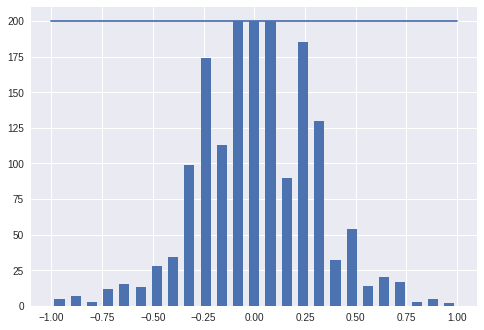

In [8]:
# Print histogram of steering

num_bins = 25
samples_per_bin = 200 # Add a threshhold of samples
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5 # center the values by 0
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total_data: 6979
removed: 5324
remaining: 1655


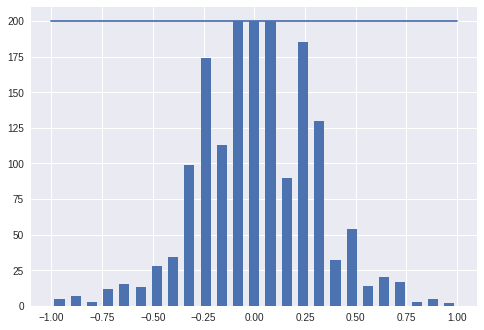

In [7]:
# Make Data uniform

print('total_data:', len(data))

remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
  
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))



In [0]:
# Import Images and Steering Data

# print(data.iloc[1]) # debug

def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steering

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [16]:
# Split Data in Training and Test Set

X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=1)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1324
Valid Samples: 331


Text(0.5, 1.0, 'Validation set')

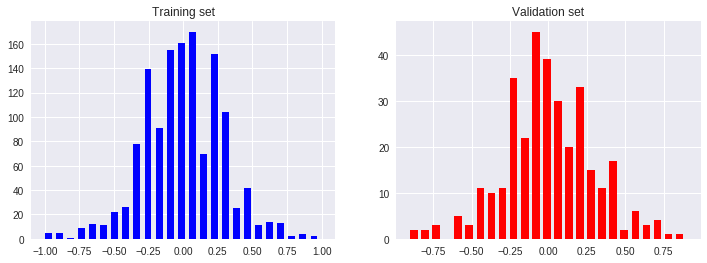

In [19]:
# Plotting Histogram of Training and Validation Data

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [0]:
# Preprocessing Images

def img_preprocess(img):
  img = npimg.imread(img)
  img = img[60:135, :, :] # crop height
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) # convert to YUV image
  img = cv2.GaussianBlur(img, (3,3), 0) # less details
  img = cv2.resize(img, (200, 66)) # nvidia modell architecture input
  img = img/255 # normalization
  return img

Text(0.5, 1.0, 'Preprocessed Image')

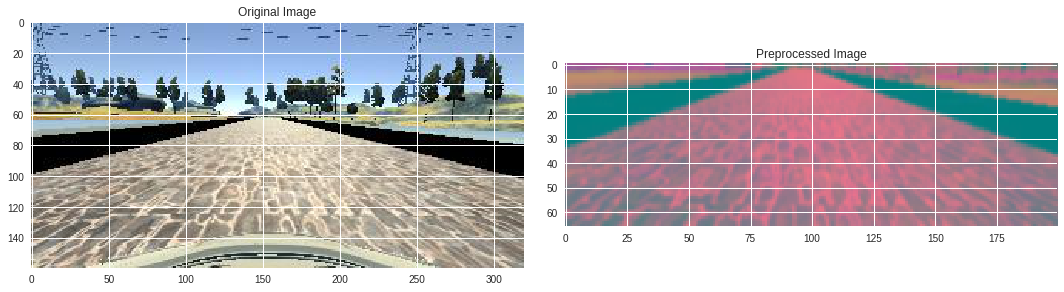

In [44]:
# Visualize Preprocessing

image = image_paths[100]
original_image = npimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [0]:
# Preprocess all images

X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(1324, 66, 200, 3)


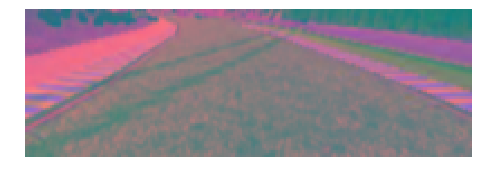

In [47]:
# Test

plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)